# Brief Pandas - Analyse de données 

---

Lecture essentielle : https://pandas.pydata.org/docs/user_guide/10min.html

Tout au long de se brief prenez des notes, afin de présenter une veille + demo/résultats, en fin de journée, à cross-call Marseille/Nice

**Entrainement:**

Avec numpy vous avez découvert les array (np.ndarray?) qui est LE principal type d'objet avec lequel on travaille avec numpy.
Pandas va nous apporter deux nouveaux types (qui encapsule les array numpy, en nous offrant de nombreuses fonctionnalités et utilitaires au array):
- pd.DataFrame?
- pd.Series?

Voici un façon de créer une DataFrame à partir d'un dictionnaire python:
```
df = pd.DataFrame({
    "colonne a": [1, 2, 3],
    "colonne b": [6, 7, 8],
    "colonne c": [0, 0, 1]
})
```


Tester cet objet, accéder au colonne. Itérer l'objet. Afficher le. Récupérer le tableau numpy. Rajouter une nouvelle colonne. Renommer toues le colonne mettant les initial en majuscule (str.title?)

---

Un agent de la DGSI vous contacte pour réaliser une mission urgente pour le gouvernement. Vous avez un 24h !

Ils ont besoin d'experts en science de la donnée pour analyser des données du Covid.

Les données sont sur le site du gouvernement sur le lien suivant : https://www.data.gouv.fr/en/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/?undefined#/resources

Pour vous faciliter la vie, ils ont réduit les données dans un premier tableau que vous pouvez analyser et qui comprend des données du covid en France, et par sexe.
(cf `reduced_covid_sexe.csv` + `metadata_covid_sexe.csv`)

ps: use the paramaters `encoding="latin-1"` to solve the encoding error you can have when loading the metadata file !
ps2: Les données "sexe sont encodé comme suit:
```
0: femmes + hommes                                                                                                                                                                                      
1: hommes                                                                                                                                                                                                  
2: femmes
```

A partir des données fournie, vous devez faire un analyse et synthèse des données. Pour chacun de vos résultats, le code associé doit être fourni (pour prouver votre réponse/analyse).
Voici ce qu'ils cherchent à savoir :
- Afficher les 15 premières lignes du tableau covid_sexe.csv. (df.head?)
- Afficher les 15 dernières lignes du tableau covid_sexe.csv. (df.tail?)
- Afficher les dataframe du metadata_sexe ? a quoi sert t'il ?
- Quelle est la période temporelle sur laquelle s'étendent les données ?
- Sur combien de jours s'étale les données ? années ?
- Dessiner un Heatmap des corrélations des caractéristiques qui vous semblent pertinentes d'observer ? Discuter les résultats
- Tracer l'evolution sur un même graphique des hospitalisations et des réanimations, pour les Femmes et pour les hommes. Discuter les résultats
- Tracer sut le même graphique le nombre de décès cumulés pour les hommes et pour les femmes, mais sur une échelle verticale différente/sépare (plt.twinx?)
- Quelle est la probabilité pour un Français (vs) une Française de mourir du Covid au début de la période disponible ? à la fin de la période disponible ?


Bonus (à ajuster en fonction de votre vitesse d'exécution ;) :

1. Retrouver le tableau de donnée "reduced_covid_sexe.csv" à partir des données csv officielle disponible sur le site de data.gouv.fr (pd.groupby?, et pd.unstack?)
    - data - par sexe https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7
    - metadata : https://www.data.gouv.fr/fr/datasets/r/3f0f1885-25f4-4102-bbab-edec5a58e34a

2. Tracer un histogramme permettant de visualiser quelles sont les régions ou la probabilité de mourir du covid en France est la plus élevé ?

3. Quelles sont les 3 régions les plus dangereuses ? les 3 les moins dangereuses ?

4. Tracer les probabilités d'hospitalisation/réanimation/décès du covid par tranche d'âge
    - data - par age (and +): https://www.data.gouv.fr/fr/datasets/r/e3d83ab3-dc52-4c99-abaf-8a38050cc68c)

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
metacsv = r'C:\Users\alaja\simplon_datai_2025\1\metadata_covid_sexe.csv'
reducedcsv = r'C:\Users\alaja\simplon_datai_2025\1\reduced_covid_sexe.csv'

meta = pd.read_csv(metacsv, sep = ';', encoding="latin-1")

dataframe = pd.read_csv(reducedcsv, sep = ';')
dataframe

,",hosp,hosp,hosp,rea,rea,rea,rad,rad,rad,dc,dc,dc"
0,"sexe,0,1,2,0,1,2,0,1,2,0,1,2"
1,"jour,,,,,,,,,,,,"
2,"2020-03-18,2972,1685,1248,771,525,239,816,432,..."
3,"2020-03-19,4073,2256,1632,1002,689,284,1180,58..."
4,"2020-03-20,5226,2912,2134,1297,905,362,1587,77..."
...,...
1106,"2023-03-27,13113,5950,6923,728,457,263,861972,..."
1107,"2023-03-28,13178,6000,6943,720,452,261,862458,..."
1108,"2023-03-29,13184,5989,6964,734,456,270,862962,..."
1109,"2023-03-30,13186,5953,7003,732,459,267,863331,..."


 Afficher les 15 premières lignes du tableau covid_sexe.csv. (df.head?)

In [70]:
dataframe.head(15)

,",hosp,hosp,hosp,rea,rea,rea,rad,rad,rad,dc,dc,dc"
0,"sexe,0,1,2,0,1,2,0,1,2,0,1,2"
1,"jour,,,,,,,,,,,,"
2,"2020-03-18,2972,1685,1248,771,525,239,816,432,..."
3,"2020-03-19,4073,2256,1632,1002,689,284,1180,58..."
4,"2020-03-20,5226,2912,2134,1297,905,362,1587,77..."
5,"2020-03-21,5900,3298,2401,1453,1018,401,1811,8..."
6,"2020-03-22,6954,3906,2815,1674,1176,461,2117,1..."
7,"2020-03-23,8673,4882,3532,2080,1465,569,2567,1..."
8,"2020-03-24,10163,5843,4149,2503,1773,694,3281,..."
9,"2020-03-25,12072,7064,4856,2935,2127,785,4085,..."


- Afficher les 15 dernières lignes du tableau covid_sexe.csv. (df.tail?)

In [71]:
dataframe.tail(15)

,",hosp,hosp,hosp,rea,rea,rea,rad,rad,rad,dc,dc,dc"
1096,"2023-03-17,13279,5982,7058,755,461,285,858444,..."
1097,"2023-03-18,13205,5973,6995,752,462,282,858672,..."
1098,"2023-03-19,13211,5979,6995,754,463,283,858680,..."
1099,"2023-03-20,13358,6052,7068,760,469,282,859128,..."
1100,"2023-03-21,13434,6083,7109,761,463,289,859586,..."
1101,"2023-03-22,13418,6088,7090,761,469,283,860128,..."
1102,"2023-03-23,13025,5912,6870,739,456,273,860867,..."
1103,"2023-03-24,13103,5937,6917,751,466,275,861310,..."
1104,"2023-03-25,13038,5902,6890,744,463,271,861538,..."
1105,"2023-03-26,13036,5903,6889,746,466,270,861565,..."


- Afficher les dataframe du metadata_sexe ? a quoi sert t'il ?

In [72]:
meta

,Colonne,Type,Description_FR,Description_EN,Exemple
0,dep,integer,DÃ©partement,Department,1
1,sexe,integer,Sexe,Sex,0
2,jour,string($date),Date de notification,Date of notice,18/03/2020
3,hosp,integer,Nombre de personnes actuellement hospitalisï¿½es,Number of people currently hospitalized,2
4,rea,integer,Nombre de personnes actuellement en services d...,Number of people currently in resuscitation or...,0
5,rad,integer,Nombre cumulï¿½ de personnes retournï¿½es ï¿½ ...,Total amount of patient that returned home,1
6,dc,integer,Nombre cumulï¿½ de personnes dï¿½cï¿½dï¿½es ï¿...,Total amout of deaths at the hospital,0
7,ssr_usld,integer,Nombre de personnes actuellement en services d...,NaN,NaN
8,hospconv,integer,Nombre de personnes actuellement en services d...,NaN,NaN
9,autres,integer,Nombre de personnes actuellement en autres typ...,NaN,NaN


Quelle est la période temporelle sur laquelle s'étendent les données ?
- Sur combien de jours s'étale les données ? années ?


In [73]:
dates= pd.read_csv(r'C:\Users\alaja\simplon_datai_2025\1\reduced_covid_sexe.csv')
ligne = dates[2:]["Unnamed: 0"]
ligne

2       2020-03-18
3       2020-03-19
4       2020-03-20
5       2020-03-21
6       2020-03-22
           ...    
1106    2023-03-27
1107    2023-03-28
1108    2023-03-29
1109    2023-03-30
1110    2023-03-31
Name: Unnamed: 0, Length: 1109, dtype: object

In [74]:
datetime = ligne.apply(pd.to_datetime)

date_range =(datetime.max() - datetime.min())
n_jour = date_range.days + 1

print(f'''
Nombre de jour totaux: {n_jour} 
Debut: {datetime.min()}
Fin: {datetime.max()}
''')


Nombre de jour totaux: 1109 
Debut: 2020-03-18 00:00:00
Fin: 2023-03-31 00:00:00



Dessiner un Heatmap des corrélations des caractéristiques qui vous semblent pertinentes d'observer ? Discuter les résultats

C:\Users\alaja\AppData\Local\Temp\ipykernel_14704\2675271956.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


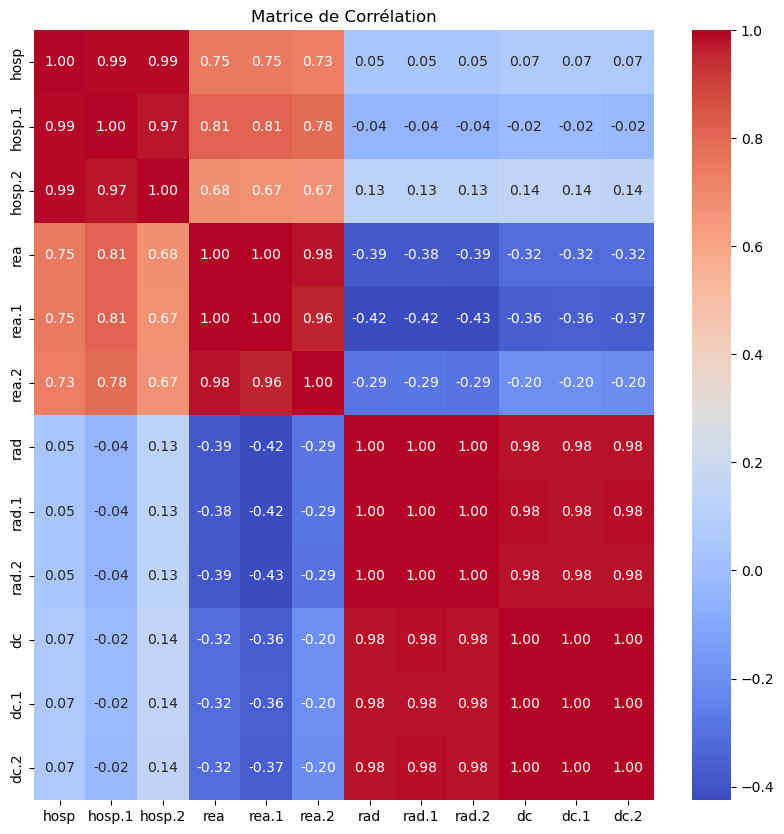

In [75]:
df= pd.read_csv(r'C:\Users\alaja\simplon_datai_2025\1\reduced_covid_sexe.csv')
correlation_matrix = df.corr()
plt.figure (figsize=(10, 10)) # Ajustez la taille de la figure si nécessaire
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

 Tracer l'evolution sur un même graphique des hospitalisations et des réanimations, pour les Femmes et pour les hommes. Discuter les résultats

In [98]:
reducedcsv = pd.read_csv(r'C:\Users\alaja\simplon_datai_2025\1\reduced_covid_sexe.csv')
df_reahomme = reducedcsv[2:]["rea.1"]
df_reafemme = reducedcsv[2:]["rea.2"]
df_hosphomme = reducedcsv[2:]["hosp.1"]
df_hospfemme = reducedcsv[2:]["hosp.2"]


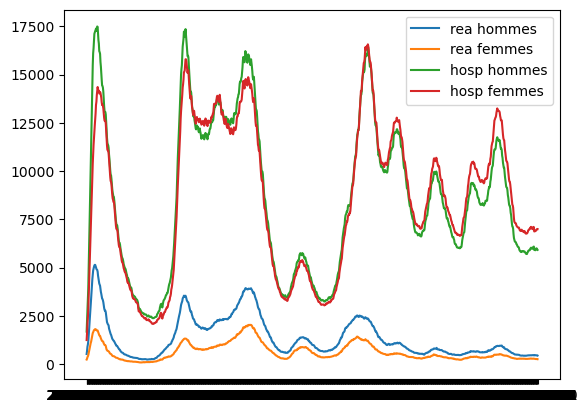

In [105]:
y = pd.DataFrame(
    data={
        "rea hommes": df_reahomme,
        "rea femmes": df_reafemme,
        "hosp hommes": df_hosphomme,
        "hosp femmes": df_hospfemme
    },)
x = ligne
fig, ax = plt.subplots()
ax.plot(x, y)
ax.legend(y.columns)
plt.show()

Tracer sur le même graphique le nombre de décès cumulés pour les hommes et pour les femmes, mais sur une échelle verticale différente/sépare (plt.twinx?)

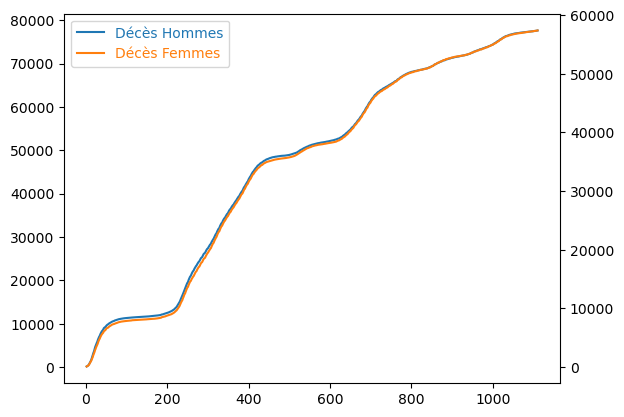

In [124]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

deces = pd.read_csv(r'C:\Users\alaja\simplon_datai_2025\1\reduced_covid_sexe.csv')
df_dchomme = deces[2:]["dc.1"]
df_dcfemme = deces[2:]["dc.2"]

host = host_subplot(111)
par = host.twinx()

host.plot(df_dchomme, label="Décès Hommes")
par.plot(df_dcfemme, label="Décès Femmes")

host.legend(labelcolor="linecolor")


plt.show()



Quelle est la probabilité pour un Français (vs) une Française de mourir du Covid au début de la période disponible ? à la fin de la période disponible ?